In [0]:
%tensorflow_version 2.x
# Libaries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow import feature_column
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# Formatting
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [0]:
train_df = pd.read_csv("https://raw.githubusercontent.com/KadhReyA/Covid19_LSTM_TF/master/Datasets/covid_19_test.csv")
val_df = pd.read_csv("https://raw.githubusercontent.com/KadhReyA/Covid19_LSTM_TF/master/Datasets/covid_19_val.csv")
y_train = train_df.pop("confirmed").astype(np.float64)
y_val = val_df.pop("confirmed").astype(np.float64)

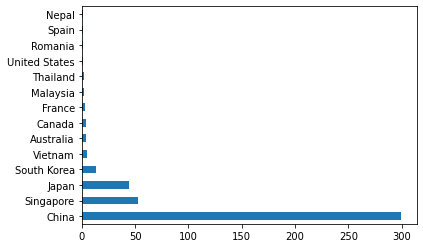

In [3]:
train_df.country.value_counts().plot(kind='barh')

Text(0.5, 0, '% confirmed')

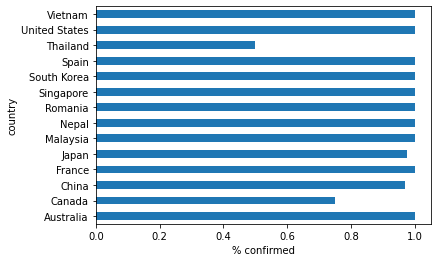

In [4]:
pd.concat([train_df, y_train], axis=1).groupby('country').confirmed.mean().plot(kind='barh').set_xlabel('% confirmed')

In [0]:
CATEGORICAL_COLUMNS = ['sex', 'country']
NUMERIC_COLUMNS = ['age', 'latitude', 'longitude']

feature_columns = []
#for feature_name in CATEGORICAL_COLUMNS:
#  vocabulary = train_df[feature_name].unique()
#  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float64))

In [0]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds = ds.shuffle(100)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

train_input_fn = make_input_fn(train_df, y_train)
eval_input_fn = make_input_fn(val_df, y_val, num_epochs=1, shuffle=False)

In [8]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
linear_est.train(train_input_fn, steps = 1)
result = linear_est.evaluate(eval_input_fn, steps = 1)

print(result)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpt_w79n_r', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 